In [2]:
import pandas as pd 
import math 
import numpy as np  

In [3]:
df=pd.read_csv("/Users/hedlighazwa/Desktop/data-extraction/data/production-clickhouse04.csv")

In [4]:
df.head(10)

,Visit Starting Date,TimeZone,Visitor Code,NEW/RETURNING,Device Type,Operating System,Browser,Referrer URL,Landing Page URL,Country,...,Goal CG_Click_Extension_Banner_Home (335272),Goal CG_Click_Extension_Banner_Home (335272) Revenue,Goal CG_Click_Extension_Banner_Bundesliga (337545),Goal CG_Click_Extension_Banner_Bundesliga (337545) Revenue,Goal CG_Click_Extension_Banner_Fussball (337547),Goal CG_Click_Extension_Banner_Fussball (337547) Revenue,Goal CG_Click_Extension_Banner_Sport (337548),Goal CG_Click_Extension_Banner_Sport (337548) Revenue,Goal CG_Click_Extension_Banner_Euro24 (342579),Goal CG_Click_Extension_Banner_Euro24 (342579) Revenue
0,07/08/2024 17:14:13,Europe/Berlin,ientdbaf29s3e7s4,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
1,07/09/2024 18:57:14,Europe/Berlin,ientdbaf29s3e7s4,RETURNING,DESKTOP,WINDOWS,FIREFOX,https://www.bild.de/,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
2,07/08/2024 00:35:38,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
3,07/08/2024 06:29:45,Europe/Berlin,ientwg3vcd91ynsb,NEW,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
4,07/08/2024 08:52:48,Europe/Berlin,ientwg3vcd91ynsb,NEW,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
5,07/08/2024 13:43:51,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
6,07/09/2024 06:49:47,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
7,07/09/2024 13:17:59,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
8,07/09/2024 15:31:51,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0
9,07/09/2024 19:21:39,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df.columns)


Index(['Visit Starting Date', 'TimeZone', 'Visitor Code', 'NEW/RETURNING',
       'Device Type', 'Operating System', 'Browser', 'Referrer URL',
       'Landing Page URL', 'Country', 'Duration (seconds)',
       'Experiment BILD: Browser Extension Home EURO24 V2 assignation',
       'Goal Engagement (70519)', 'Goal Engagement (70519) Revenue',
       'Goal CG_BILD_MainSalesGoal (183672)',
       'Goal CG_BILD_MainSalesGoal (183672) Revenue',
       'Goal CG_TEST_APPLIED (190493)',
       'Goal CG_TEST_APPLIED (190493) Revenue',
       'Goal CG_TEST_NOT_APPLIED_22 (190494)',
       'Goal CG_TEST_NOT_APPLIED_22 (190494) Revenue',
       'Goal CG_BILD_MainCancellationGoal (308642)',
       'Goal CG_BILD_MainCancellationGoal (308642) Revenue',
       'Goal CG_BILD_MainRegistrationGoal (308830)',
       'Goal CG_BILD_MainRegistrationGoal (308830) Revenue',
       'Goal CG_Click_Extension_Banner_All (334806)',
       'Goal CG_Click_Extension_Banner_All (334806) Revenue',
       'Goal CG_Exten

IS IT NORMAL TO HAVE columns not binary? 

In [6]:
valeurs_uniques = df['Goal CG_BILD_MainCancellationGoal (308642)'].unique()
valeurs_uniques

array([0, 1, 2, 6, 3])

In [47]:
valeur= df['Experiment BILD: Browser Extension Home EURO24 V2 assignation'].unique()
valeur



array(['V1: Der geniale Trick (988277)',
       'V2: Alle Highlight-Videos (988278)'], dtype=object)

In [8]:
value_counts = df['Goal CG_TEST_NOT_APPLIED_22 (190494)'].value_counts()
value_counts

Goal CG_TEST_NOT_APPLIED_22 (190494)
0    6383529
1         77
2         16
6          2
5          2
3          1
Name: count, dtype: int64

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Country,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration (seconds),6383627.0,575.237868,862.697266,0.0,78.0,235.0,681.0,7200.0
Goal Engagement (70519),6383627.0,0.688783,0.479323,0.0,0.0,1.0,1.0,27.0
Goal Engagement (70519) Revenue,6383627.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Goal CG_BILD_MainSalesGoal (183672),6383627.0,0.000049,0.007036,0.0,0.0,0.0,0.0,2.0
Goal CG_BILD_MainSalesGoal (183672) Revenue,6383627.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Goal CG_TEST_APPLIED (190493),6383627.0,2.317759,1.953934,0.0,1.0,2.0,3.0,475.0
Goal CG_TEST_APPLIED (190493) Revenue,6383627.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Goal CG_TEST_NOT_APPLIED_22 (190494),6383627.0,0.000021,0.006528,0.0,0.0,0.0,0.0,6.0
Goal CG_TEST_NOT_APPLIED_22 (190494) Revenue,6383627.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
value_counts = df['Goal CG_Click_Extension_Banner_Sport (337548)'].value_counts()


In [11]:
value_counts

Goal CG_Click_Extension_Banner_Sport (337548)
0    6383464
1        162
2          1
Name: count, dtype: int64

In [12]:
df.shape

(6383627, 38)

In [13]:

df['Nbr_visit'] = df.groupby('Visitor Code')['Visitor Code'].transform('count')

df.head(4)

,Visit Starting Date,TimeZone,Visitor Code,NEW/RETURNING,Device Type,Operating System,Browser,Referrer URL,Landing Page URL,Country,...,Goal CG_Click_Extension_Banner_Home (335272) Revenue,Goal CG_Click_Extension_Banner_Bundesliga (337545),Goal CG_Click_Extension_Banner_Bundesliga (337545) Revenue,Goal CG_Click_Extension_Banner_Fussball (337547),Goal CG_Click_Extension_Banner_Fussball (337547) Revenue,Goal CG_Click_Extension_Banner_Sport (337548),Goal CG_Click_Extension_Banner_Sport (337548) Revenue,Goal CG_Click_Extension_Banner_Euro24 (342579),Goal CG_Click_Extension_Banner_Euro24 (342579) Revenue,Nbr_visit
0,07/08/2024 17:14:13,Europe/Berlin,ientdbaf29s3e7s4,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,7
1,07/09/2024 18:57:14,Europe/Berlin,ientdbaf29s3e7s4,RETURNING,DESKTOP,WINDOWS,FIREFOX,https://www.bild.de/,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,7
2,07/08/2024 00:35:38,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,24
3,07/08/2024 06:29:45,Europe/Berlin,ientwg3vcd91ynsb,NEW,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,0,24


In [14]:
df_visits = df.groupby('Visitor Code').size().reset_index(name='number_of_visits')


In [15]:
df_visits.head(3)

,Visitor Code,number_of_visits
0,000094s5we6zhidt,14
1,0000dpvdlae0d4dk,15
2,0000yfp91gukgysw,7


In [16]:
df_visits = df_visits.reset_index(drop=True)


In [17]:

goal_columns  = [col for col in df.columns if (col.startswith('Goal') and  not col.endswith(' Revenue'))]

#goal_columns = [col for col in df_filtered .columns if col.startswith('Goal')]
df['goal_product'] = df[goal_columns].prod(axis=1)

In [18]:
df.head(5)

,Visit Starting Date,TimeZone,Visitor Code,NEW/RETURNING,Device Type,Operating System,Browser,Referrer URL,Landing Page URL,Country,...,Goal CG_Click_Extension_Banner_Bundesliga (337545),Goal CG_Click_Extension_Banner_Bundesliga (337545) Revenue,Goal CG_Click_Extension_Banner_Fussball (337547),Goal CG_Click_Extension_Banner_Fussball (337547) Revenue,Goal CG_Click_Extension_Banner_Sport (337548),Goal CG_Click_Extension_Banner_Sport (337548) Revenue,Goal CG_Click_Extension_Banner_Euro24 (342579),Goal CG_Click_Extension_Banner_Euro24 (342579) Revenue,Nbr_visit,goal_product
0,07/08/2024 17:14:13,Europe/Berlin,ientdbaf29s3e7s4,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,7,0
1,07/09/2024 18:57:14,Europe/Berlin,ientdbaf29s3e7s4,RETURNING,DESKTOP,WINDOWS,FIREFOX,https://www.bild.de/,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,7,0
2,07/08/2024 00:35:38,Europe/Berlin,ientwg3vcd91ynsb,RETURNING,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,24,0
3,07/08/2024 06:29:45,Europe/Berlin,ientwg3vcd91ynsb,NEW,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,24,0
4,07/08/2024 08:52:48,Europe/Berlin,ientwg3vcd91ynsb,NEW,DESKTOP,WINDOWS,FIREFOX,NaN,https://www.bild.de/,NaN,...,0,0,0,0,0,0,0,0,24,0


In [19]:
goal_columns


['Goal Engagement (70519)',
 'Goal CG_BILD_MainSalesGoal (183672)',
 'Goal CG_TEST_APPLIED (190493)',
 'Goal CG_TEST_NOT_APPLIED_22 (190494)',
 'Goal CG_BILD_MainCancellationGoal (308642)',
 'Goal CG_BILD_MainRegistrationGoal (308830)',
 'Goal CG_Click_Extension_Banner_All (334806)',
 'Goal CG_Extension_Banner_in_Viewport (334916)',
 'Goal CG_Click_Extension_Banner_Home (335272)',
 'Goal CG_Click_Extension_Banner_Bundesliga (337545)',
 'Goal CG_Click_Extension_Banner_Fussball (337547)',
 'Goal CG_Click_Extension_Banner_Sport (337548)',
 'Goal CG_Click_Extension_Banner_Euro24 (342579)']

<font size="3">Based on data description and column values, we opted for choosing the column Goal <span style="color:red"> CG_Click_Extension_Banner_Sport (337548)</span> because it represents almost binary set.</font>


In [20]:

df_visits['converted_sessions']=df.groupby('Visitor Code')['Goal CG_Click_Extension_Banner_Sport (337548)'].transform('sum')

In [21]:
df_visits['converted_sessions'].value_counts()


converted_sessions
0    1419443
1        285
2          4
Name: count, dtype: int64

In [22]:
df_visits

,Visitor Code,number_of_visits,converted_sessions
0,000094s5we6zhidt,14,0
1,0000dpvdlae0d4dk,15,0
2,0000yfp91gukgysw,7,0
3,0001490914osqkz9,1,0
4,0001a1yubohrmj4n,8,0
...,...,...,...
1419727,zzzv03fimrqgto7z,15,0
1419728,zzzwh62gmdhuqseu,1,0
1419729,zzzwk9trf8cf9xqp,1,0
1419730,zzzwzcedivz7ysxz,1,0


In [23]:
## Mean and variance estimator calculation 
mu_S=df_visits['converted_sessions'].mean()
mu_N=df_visits['number_of_visits'].mean()
cov_matrix = np.cov(df_visits['converted_sessions'].values,df_visits['number_of_visits'].values)
var_SN= cov_matrix[0, 1] 

#number of visitors 
k=df_visits.shape[0]
print("average converted session is " , np.round(mu_S,5))
print("average number of visit/user  is " , np.round(mu_N ,2))


average converted session is  0.00021
average number of visit/user  is  4.5


In [24]:
cov_matrix

array([[2.11969402e-04, 1.21548624e-04],
       [1.21548624e-04, 3.57191286e+01]])

Now we caluclate the variance of our estimator based on the Delta Method
$$
\bar{X} = \frac{\sum_{i,j} X_{ij}}{\sum_i N_i} = \frac{\sum_i S_i / k}{\sum_i N_i / k} = \bar{S}
$$




$$
\text{Var}\left( \frac{\bar{S}}{\bar{N}} \right) \approx \frac{1}{k \mu_N^2} \left( \sigma_S^2 - 2 \frac{\mu_S}{\mu_N} \sigma_{SN} + \frac{\mu_S^2}{\mu_N^2} \sigma_N^2 \right)
$$



In [25]:

w=mu_S/mu_N
var_X=1/(k*mu_N**2)*(cov_matrix[0,0]-2*w*var_SN+w**2*cov_matrix[1,1])

In [26]:
var_X

7.38713157307623e-12

In [39]:
test=df[df['Experiment BILD: Browser Extension Home EURO24 V2 assignation']=='V1: Der geniale Trick (988277)']

<Axes: >

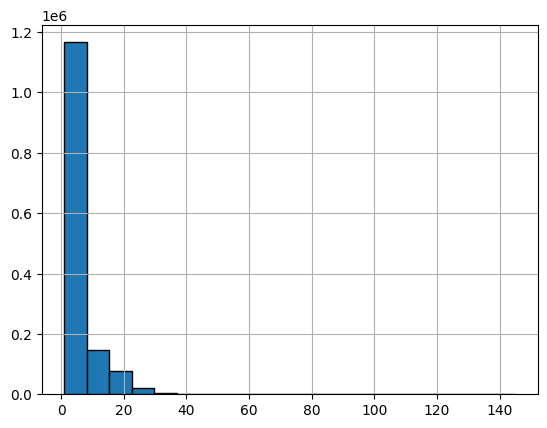

In [45]:
import matplotlib.pyplot as plt
df_visits['number_of_visits'].hist(bins=20, edgecolor='black')
